In [117]:
import pandas as pd

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [119]:
import numpy as np

In [120]:
df = pd.read_csv('../data/dataset_LogETL_LogServer.csv')

In [121]:
df.head()

,Date et heure,nb_operations_error,nb_operations,rows_added,rows_updated,rows_deleted,Somme (Volume)(Mo),Somme (Débit)(Mbit/s),Trafic entrant (Volume)(o),Trafic entrant (Débit)(o/s),...,Processeur 1(%),Processeur 2(%),Processeur 3(%),Processeur 4(%),Processeur 5(%),Processeur 6(%),Processeur 7(%),Processeur 8(%),Temps mort cpu(%),Couverture cpu(%)
0,2024-08-25 00:00:00,0.0,0.0,0.0,0.0,0.0,6.288009e+10,1.746693e+07,5.283779e+10,1.467737e+07,...,10.6667,17.3333,30.5833,25.5000,49.0833,13.1667,32.9167,14.1667,0.0,4000.0
1,2024-08-25 01:00:00,0.0,0.0,0.0,0.0,0.0,4.691631e+10,1.303249e+07,3.645585e+10,1.012677e+07,...,2.5000,8.5833,45.5000,19.0833,7.7500,2.5000,44.5833,8.2500,0.0,4000.0
2,2024-08-25 02:00:00,0.0,0.0,0.0,0.0,0.0,3.431603e+10,9.532415e+06,2.317469e+10,6.437540e+06,...,12.0000,13.1667,65.5833,19.2500,9.7500,15.1667,23.8333,16.0000,0.0,4000.0
3,2024-08-25 03:00:00,0.0,0.0,0.0,0.0,0.0,4.558972e+06,1.266399e+03,2.578988e+06,7.163955e+02,...,0.0833,0.0833,0.0833,1.3333,0.1667,0.1667,0.0833,0.3333,0.0,4000.0
4,2024-08-25 04:00:00,0.0,11.0,200563.0,0.0,0.0,8.423123e+07,2.339789e+04,4.723165e+07,1.312008e+04,...,0.0833,0.1667,0.6667,1.5833,0.0833,0.1667,0.4167,0.4167,0.0,4000.0


In [122]:
df_etl_ope = df[df['nb_operations'] != 0]

In [123]:
X = df_etl_ope.drop(columns=['nb_operations_error'])
Y = df_etl_ope['nb_operations_error']

In [124]:
#y_bins = np.digitize(Y, bins=[0, 1])
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=y_bins, random_state=42)
X_train_heure, X_test_heure, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=29)

In [125]:
heure_train = X_train_heure['Date et heure']
heure_test = X_test_heure['Date et heure']
X_train = X_train_heure.drop(columns='Date et heure')
X_test = X_test_heure.drop(columns='Date et heure')

In [126]:
X_train.shape

(576, 62)

In [127]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(loss="quantile", alpha=0.95)  # Alpha proche de 1 pour bien prédire les pics
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

In [128]:
#model = LinearRegression()

#model.fit(X_train, Y_train)

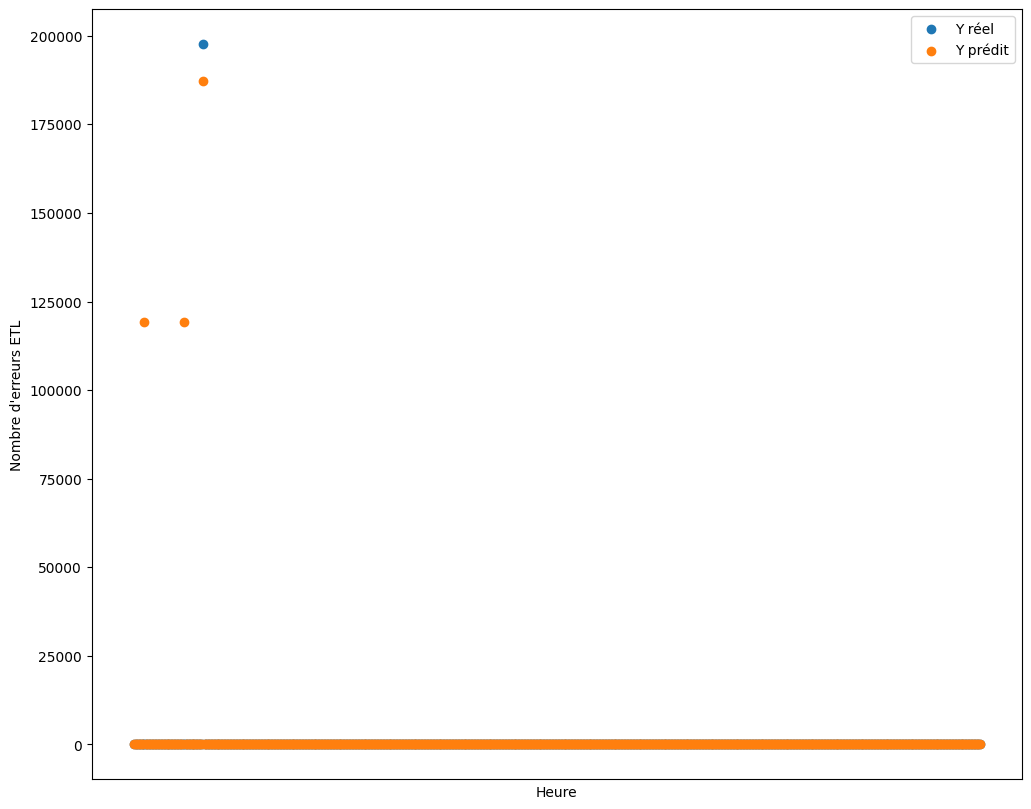

In [129]:
import matplotlib.pyplot as plt

# Faire les prédictions
y_pred = model.predict(X_train)

# Construire un DataFrame avec les résultats
df_results = pd.DataFrame({
    'heure': heure_train,  # Réintégration des heures
    'y_réel': Y_train,
    'y_prédit': y_pred
})

# Trier par heure pour un affichage chronologique
df_results = df_results.sort_values(by='heure')

plt.figure(figsize=(12, 10))
plt.scatter(df_results['heure'], df_results['y_réel'], label="Y réel")
plt.scatter(df_results['heure'], df_results['y_prédit'], label="Y prédit")
plt.xlabel("Heure")
plt.xticks([], [])
plt.ylabel("Nombre d'erreurs ETL")
plt.legend()
plt.xticks(rotation=45)
plt.show()

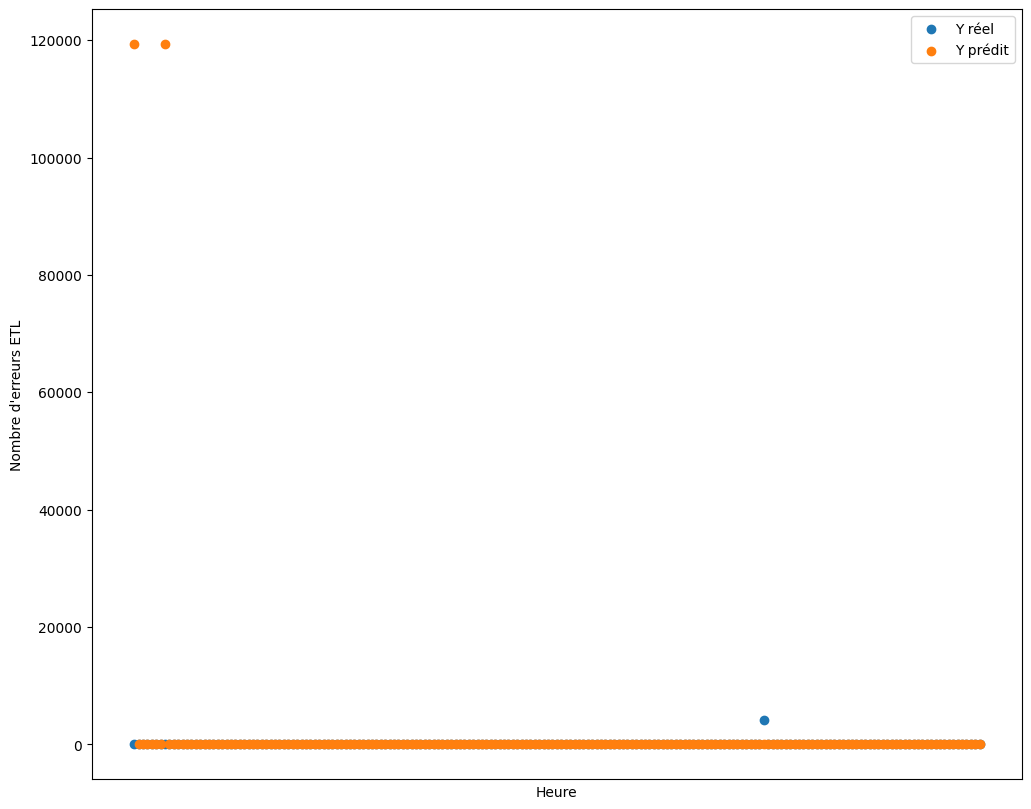

In [130]:
import matplotlib.pyplot as plt

# Faire les prédictions
y_pred = model.predict(X_test)

# Construire un DataFrame avec les résultats
df_results = pd.DataFrame({
    'heure': heure_test,  # Réintégration des heures
    'y_réel': Y_test,
    'y_prédit': y_pred
})

# Trier par heure pour un affichage chronologique
df_results = df_results.sort_values(by='heure')

plt.figure(figsize=(12, 10))
plt.scatter(df_results['heure'], df_results['y_réel'], label="Y réel")
plt.scatter(df_results['heure'], df_results['y_prédit'], label="Y prédit")
plt.xlabel("Heure")
plt.xticks([], [])
plt.ylabel("Nombre d'erreurs ETL")
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Sans valeurs abérantes

In [131]:
top_2_values = df_etl_ope['nb_operations_error'].nlargest(2).unique()
print(top_2_values)

[197560.   4230.]


In [132]:
df_etl_ope_filtered = df_etl_ope[df_etl_ope['nb_operations_error'] < 4200]

In [133]:
top_2_values = df_etl_ope_filtered['nb_operations_error'].nlargest(2).unique()
print(top_2_values)

[144. 110.]


In [134]:
X = df_etl_ope_filtered.drop(columns=['nb_operations_error'])
Y = df_etl_ope_filtered['nb_operations_error']

In [135]:
X_train_heure, X_test_heure, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=29)

In [136]:
heure_train = X_train_heure['Date et heure']
heure_test = X_test_heure['Date et heure']
X_train = X_train_heure.drop(columns='Date et heure')
X_test = X_test_heure.drop(columns='Date et heure')

In [137]:
model = GradientBoostingRegressor(loss="quantile", alpha=0.95)  # Alpha proche de 1 pour bien prédire les pics
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)

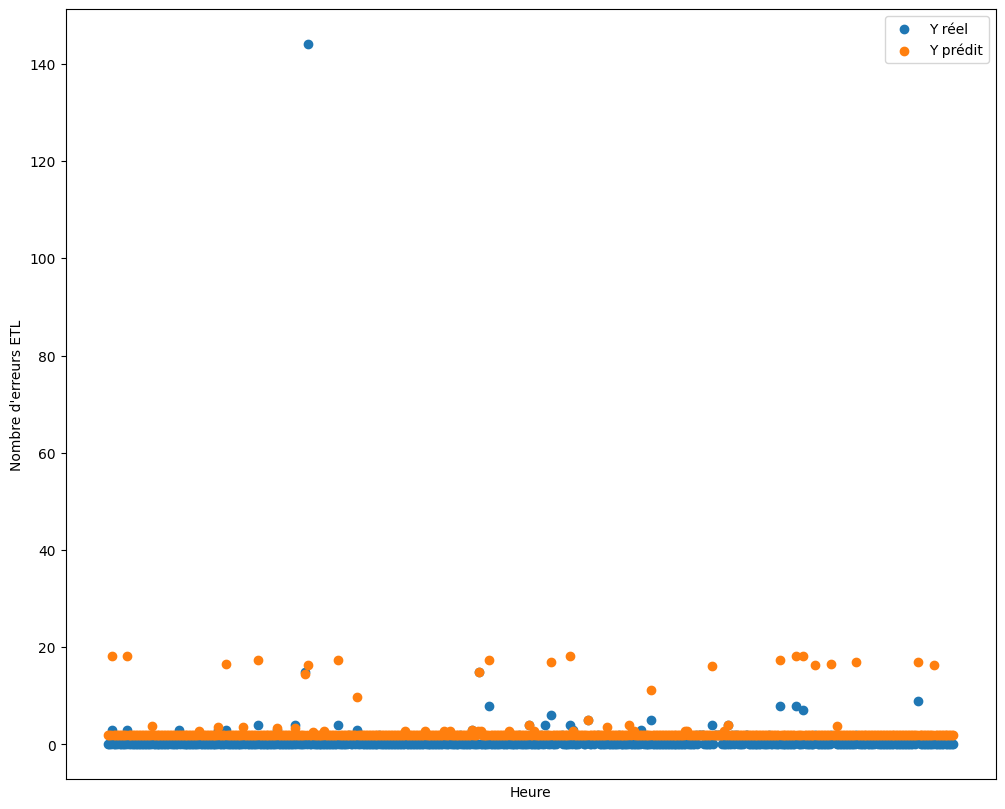

In [138]:
# Faire les prédictions
y_pred = model.predict(X_train)

# Construire un DataFrame avec les résultats
df_results = pd.DataFrame({
    'heure': heure_train,  # Réintégration des heures
    'y_réel': Y_train,
    'y_prédit': y_pred
})

# Trier par heure pour un affichage chronologique
df_results = df_results.sort_values(by='heure')

plt.figure(figsize=(12, 10))
plt.scatter(df_results['heure'], df_results['y_réel'], label="Y réel")
plt.scatter(df_results['heure'], df_results['y_prédit'], label="Y prédit")
plt.xlabel("Heure")
plt.xticks([], [])
plt.ylabel("Nombre d'erreurs ETL")
plt.legend()
plt.xticks(rotation=45)
plt.show()

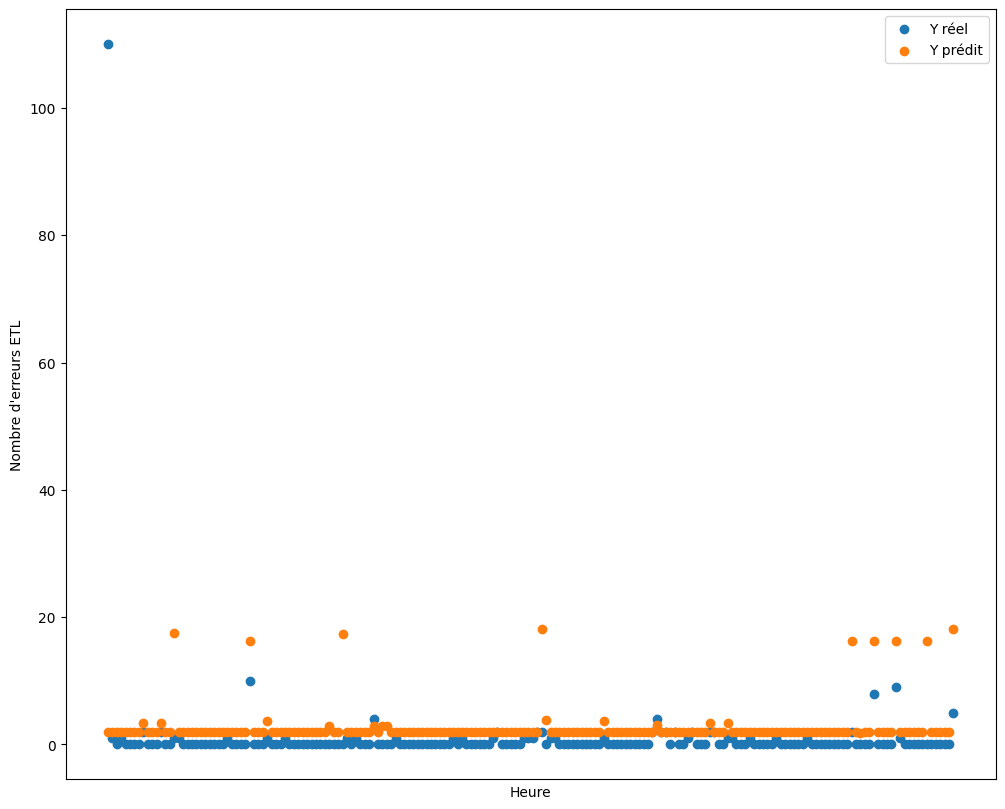

In [139]:
# Faire les prédictions
y_pred = model.predict(X_test)

# Construire un DataFrame avec les résultats
df_results = pd.DataFrame({
    'heure': heure_test,  # Réintégration des heures
    'y_réel': Y_test,
    'y_prédit': y_pred
})

# Trier par heure pour un affichage chronologique
df_results = df_results.sort_values(by='heure')

plt.figure(figsize=(12, 10))
plt.scatter(df_results['heure'], df_results['y_réel'], label="Y réel")
plt.scatter(df_results['heure'], df_results['y_prédit'], label="Y prédit")
plt.xlabel("Heure")
plt.xticks([], [])
plt.ylabel("Nombre d'erreurs ETL")
plt.legend()
plt.xticks(rotation=45)
plt.show()